## Content

  - **SGD/Mini batch**
  - **Extending Linear Regression - Polynomial Regression**
  

# **Stochastic Gradient Descent/ Mini Batch GD**



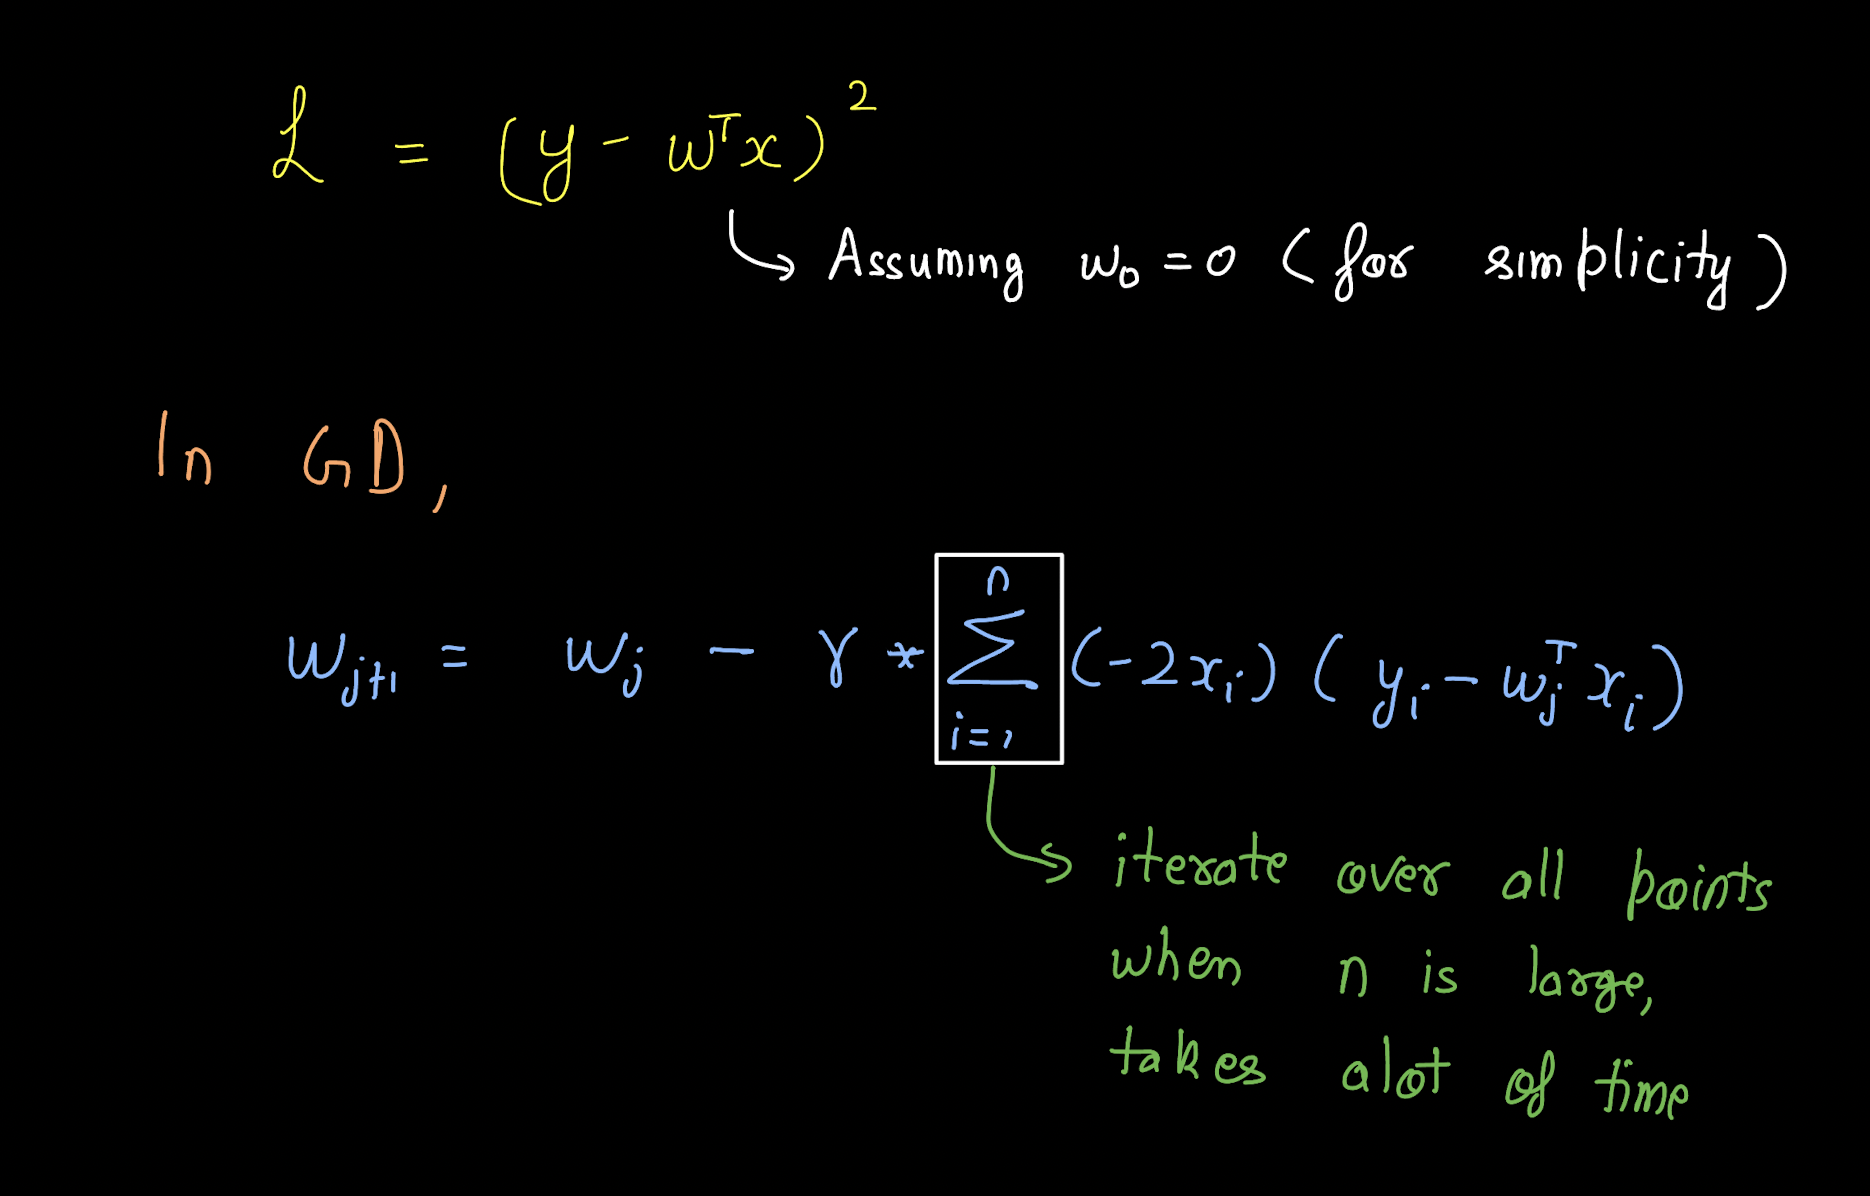

Till now, we used Gradient Descent to optimize the weights of the Linear Regression model.

$$Loss = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i} )^2 ; \hat{y_i} = w^t x_i$$

$$ w_{j+1} = w_j - \frac{α}{n} \times \sum_{i=1}^{n} (-2 x_i) (y_i-w_j^tx_i) $$



- We take the average of the gradients of all the training examples
- use that mean gradient to update our parameters.
- one step of gradient descent in one epoch ($j$)


<br>


#### What can be a problem with Gradient Descent (GD) ?

As we interate over all the points to calculate the gradient.

- Imagine if number of datapoints is large (~ 1 million)
- For each update, we'll iterate through all the points and calculate gradient
- This becomes computationally expensive and time consuming





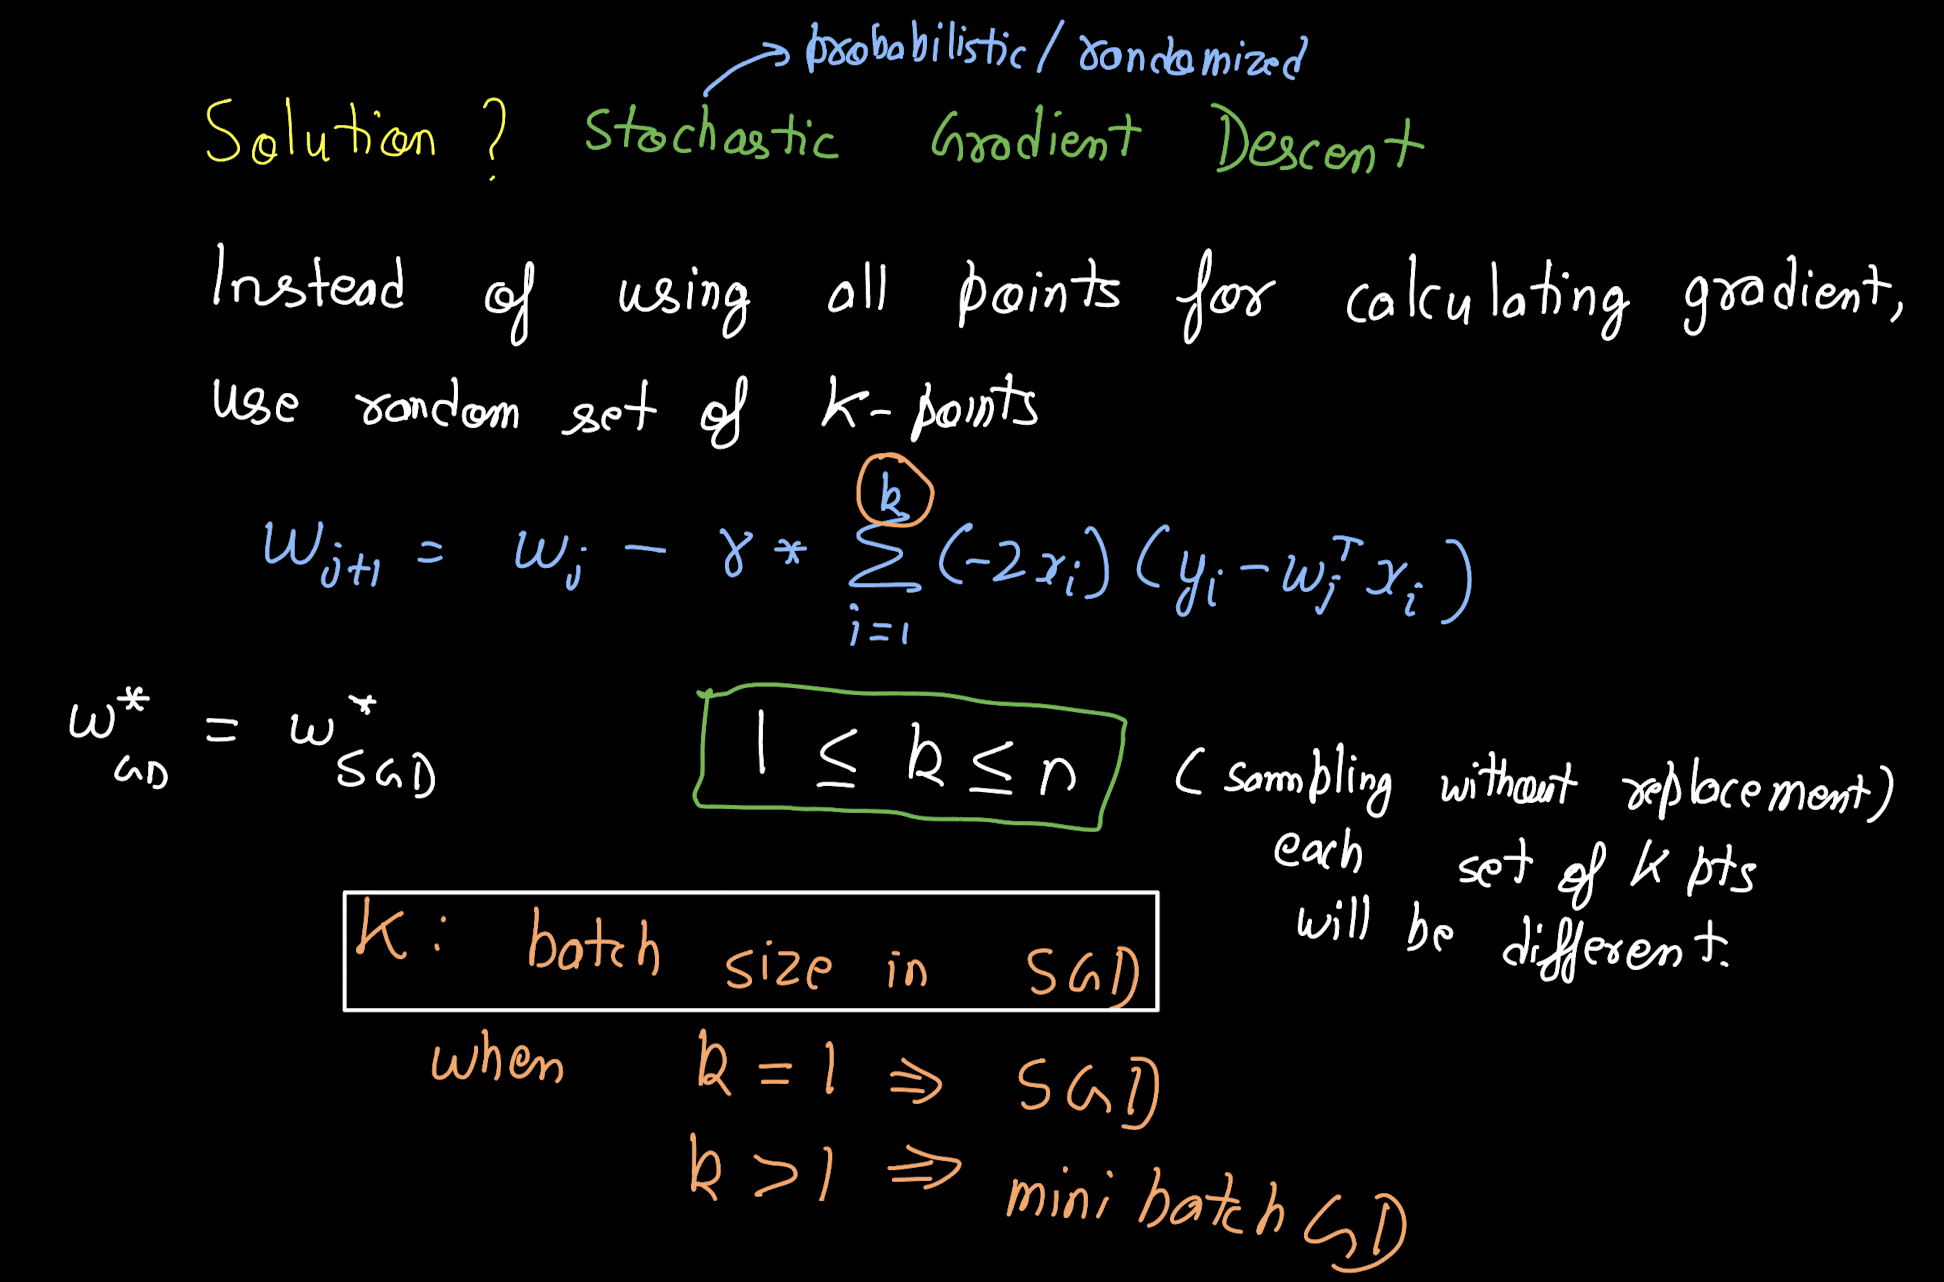

#### **How do we solve the time intensive problem of GD when $n$ is (~million) ?**

To tackle this problem,
- instead of using all points, we use random set of `k` datapoints for gradient
- Each set of these k points will be unique (sampling without replacement)
- This k is called **batch size**

<br>

When k = 1, it is called SGD (Stochastic Gradient Descent)

When k > 1, Mini batch GD.

# **Mini-Batch Gradient code**

#### Importing libraries


In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

#### Creating a dummy data

Creaing a 5000 data with only one feature

- multivariate_normal documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [ ]:
mean = np.array([4.0, 5.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 5000)

In [ ]:
data.shape

(5000, 2)

In [ ]:
data[:5]

array([[4.1584215 , 4.56613404],
       [3.59882416, 3.53621055],
       [4.80461235, 5.90409996],
       [2.63472165, 3.73297533],
       [3.8525501 , 4.82208931]])

Plotting the data

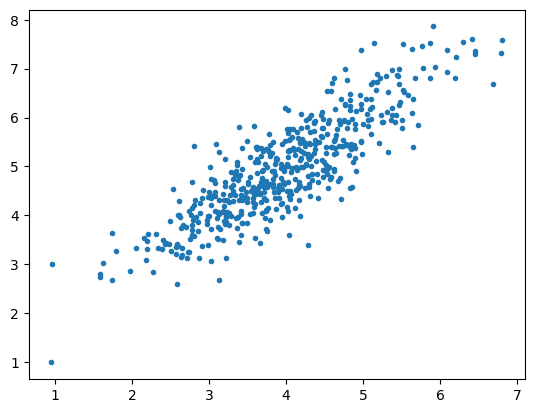

In [ ]:
# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker = '.')
plt.show()

In [ ]:
# adding bias column (for w0) to data
data = np.hstack((np.ones((data.shape[0], 1)), data))

In [ ]:
data[:5]

array([[1.        , 4.1584215 , 4.56613404],
       [1.        , 3.59882416, 3.53621055],
       [1.        , 4.80461235, 5.90409996],
       [1.        , 2.63472165, 3.73297533],
       [1.        , 3.8525501 , 4.82208931]])

In [ ]:
X = data[: ,:-1]
y = data[:, -1].reshape(-1,1)


#### Model Function (also called as Hypothesis formally)


In [ ]:
# function to compute hypothesis / predictions
def predict(X, weight):
    return np.dot(X, weight)

#### Calculating Gradient

In [ ]:
# function to compute gradient of error function w.r.t. weight
def gradient(X, y, weight):
    y_pred = predict(X, weight)
    grad = np.dot(X.transpose(), (y_pred - y))
    return grad

#### Calculating Error

In [ ]:
# function to compute the error for current values of weight
def cost(X, y, weight):
    y_pred = predict(X, weight)
    e = np.mean((y-y_pred)**2)

    return e

#### Creating mini batches

dividing the data into sets of 32 datapoints,
- hence minibatch_count contains = $\frac{5000}{32} = 156.25 = 156 $ sets

In [ ]:
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size = 32):

    mini_batches = []
    data = np.hstack((X, y))

    np.random.shuffle(data)
    minibatch_count = data.shape[0] // batch_size
    i = 0

    for i in range(minibatch_count + 1):
        # stores 32 datapoint for a single set out of 156
        mini_batch = data[i * batch_size: (i + 1)*batch_size, :]
        X_minibatch = mini_batch[:, :-1]
        Y_minibatch = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_minibatch, Y_minibatch))


    # if data.shape[0] % batch_size != 0:
    #     mini_batch = data[i * batch_size:data.shape[0]]
    #     X_minibatch = mini_batch[:, :-1]
    #     Y_minibatch = mini_batch[:, -1].reshape((-1, 1))
    #     mini_batches.append((X_minibatch, Y_minibatch))


    return mini_batches

#### Implementing Mini batch GD

In [ ]:
# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate = 0.0001, batch_size = 32):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3

    for itr in range(max_iters):
        # creates mini- batch
        mini_batches = create_mini_batches(X, y, batch_size)

        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            weight = weight - learning_rate * gradient(X_mini, y_mini, weight)
            error_list.append(cost(X_mini, y_mini, weight))

    return weight, error_list

**Observe**

The only difference from the earlier scratch implementation of Linear Regression and here is:
- The introduction of **mini_batches**

Plotting the weights of the Linear Regression

w_0 =  [0.31758177]
w_1 =  [[0.31758177]
 [1.08601203]]


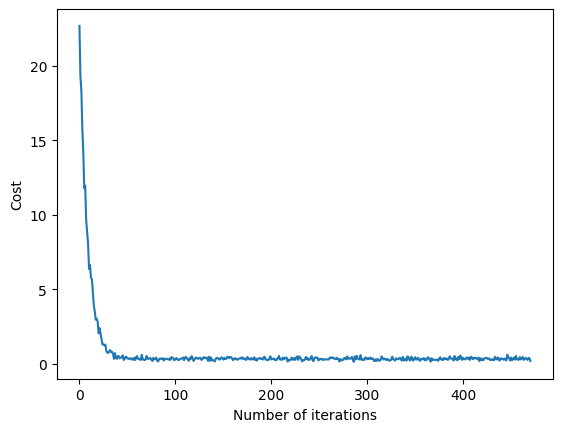

In [ ]:
weight, error_list = gradientDescent(X, y)
print("w_0 = ", weight[0])
print("w_1 = ", weight[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

# Extending Linear Regression - Polynomial Regression

Now lets consider another dummy data

- Here, we have 50 datapoints
- But now the data is non-linear in nature

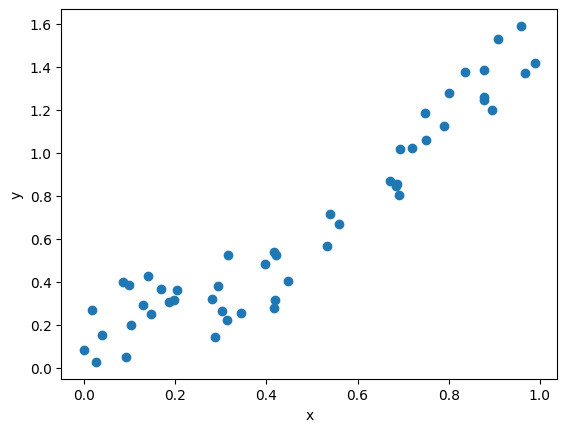

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect
fig = plt.figure()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### How does linear regression perform on this variable?

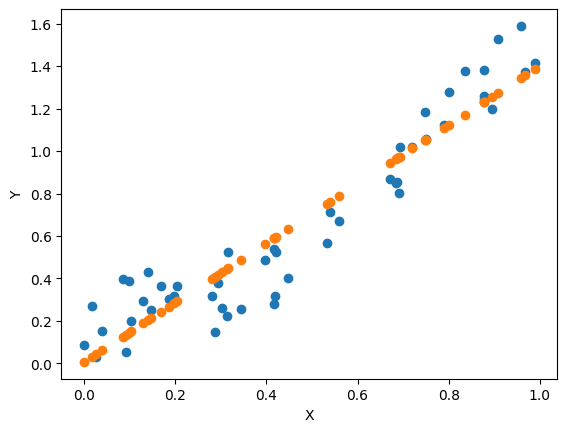

0.8919326382437994

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
output = model.predict(X)
fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
display(model.score(X, y))

**observe**
- The model did not perform well when non-linearity is introduced



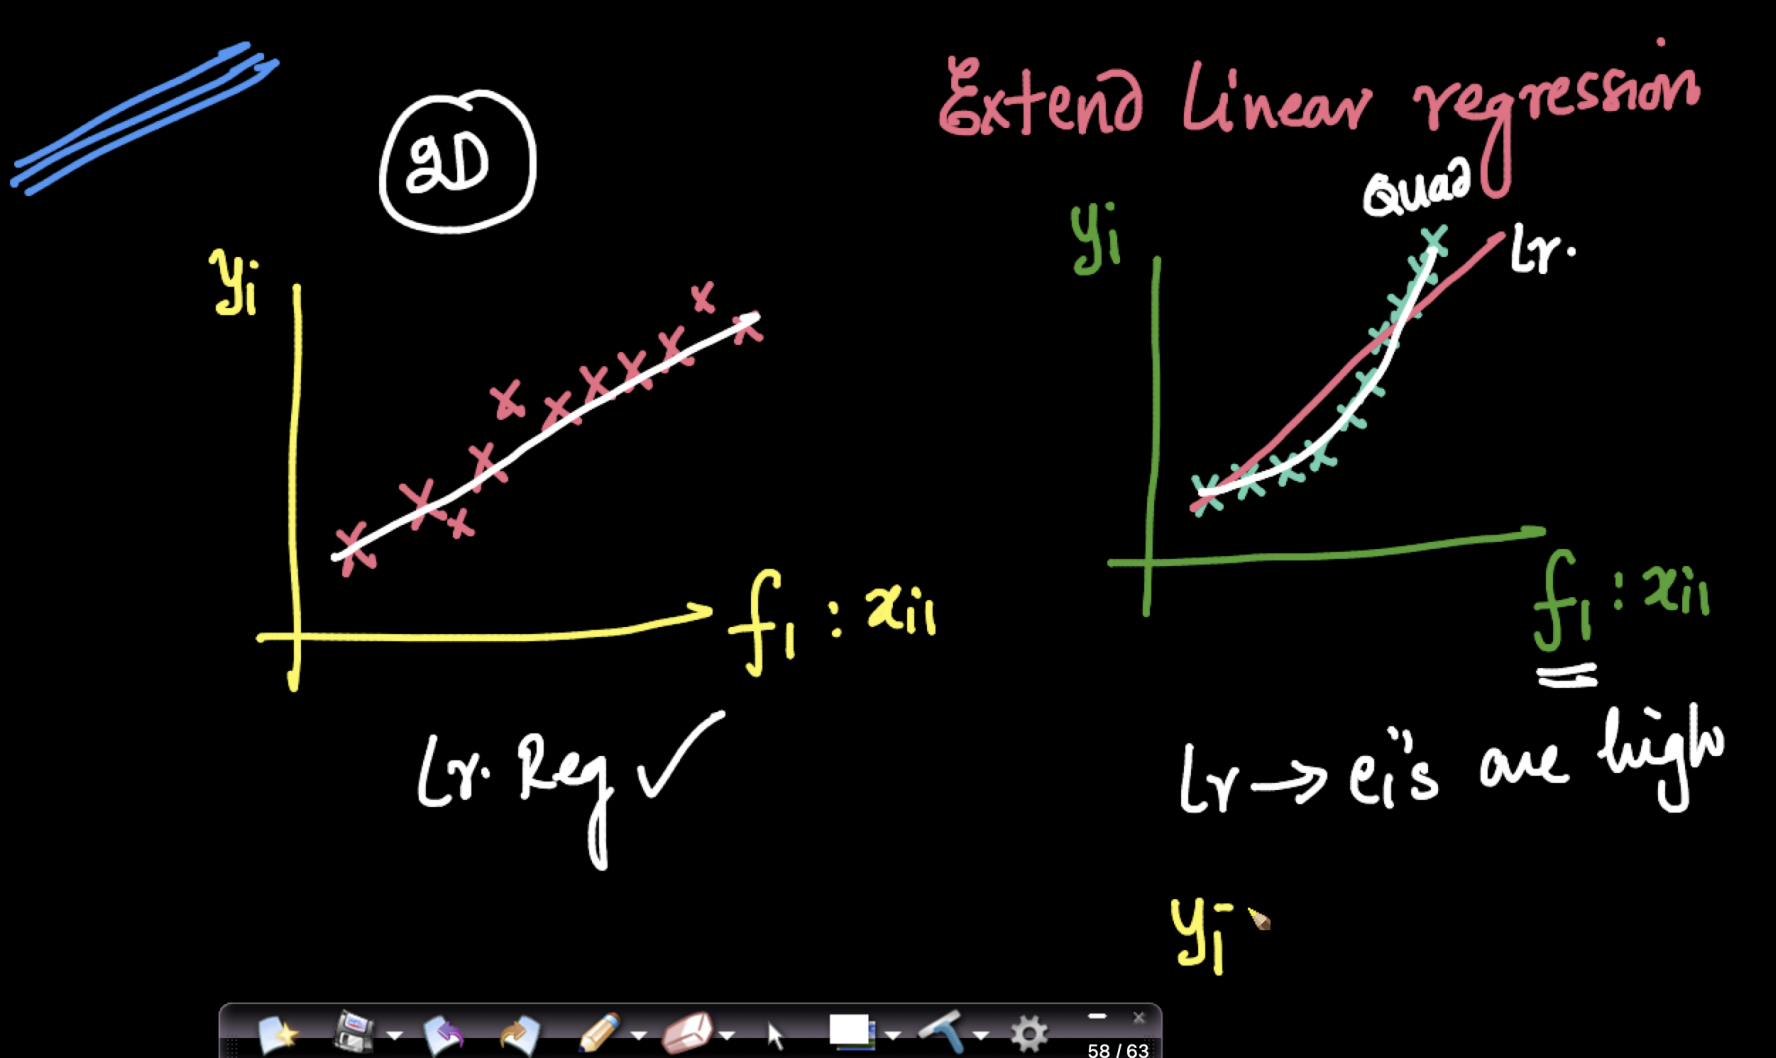

Now if we look at our scenario, it looks like the image in the right:

- We have only a single feature f1 in our dummy data

- **Left plot**: Shows a good linear relationship and linear regression fits
pefectly on it.

- **right plot**: Shows points are in quadratic curve. If you fit a Linear Regression, the error are bound to be high.

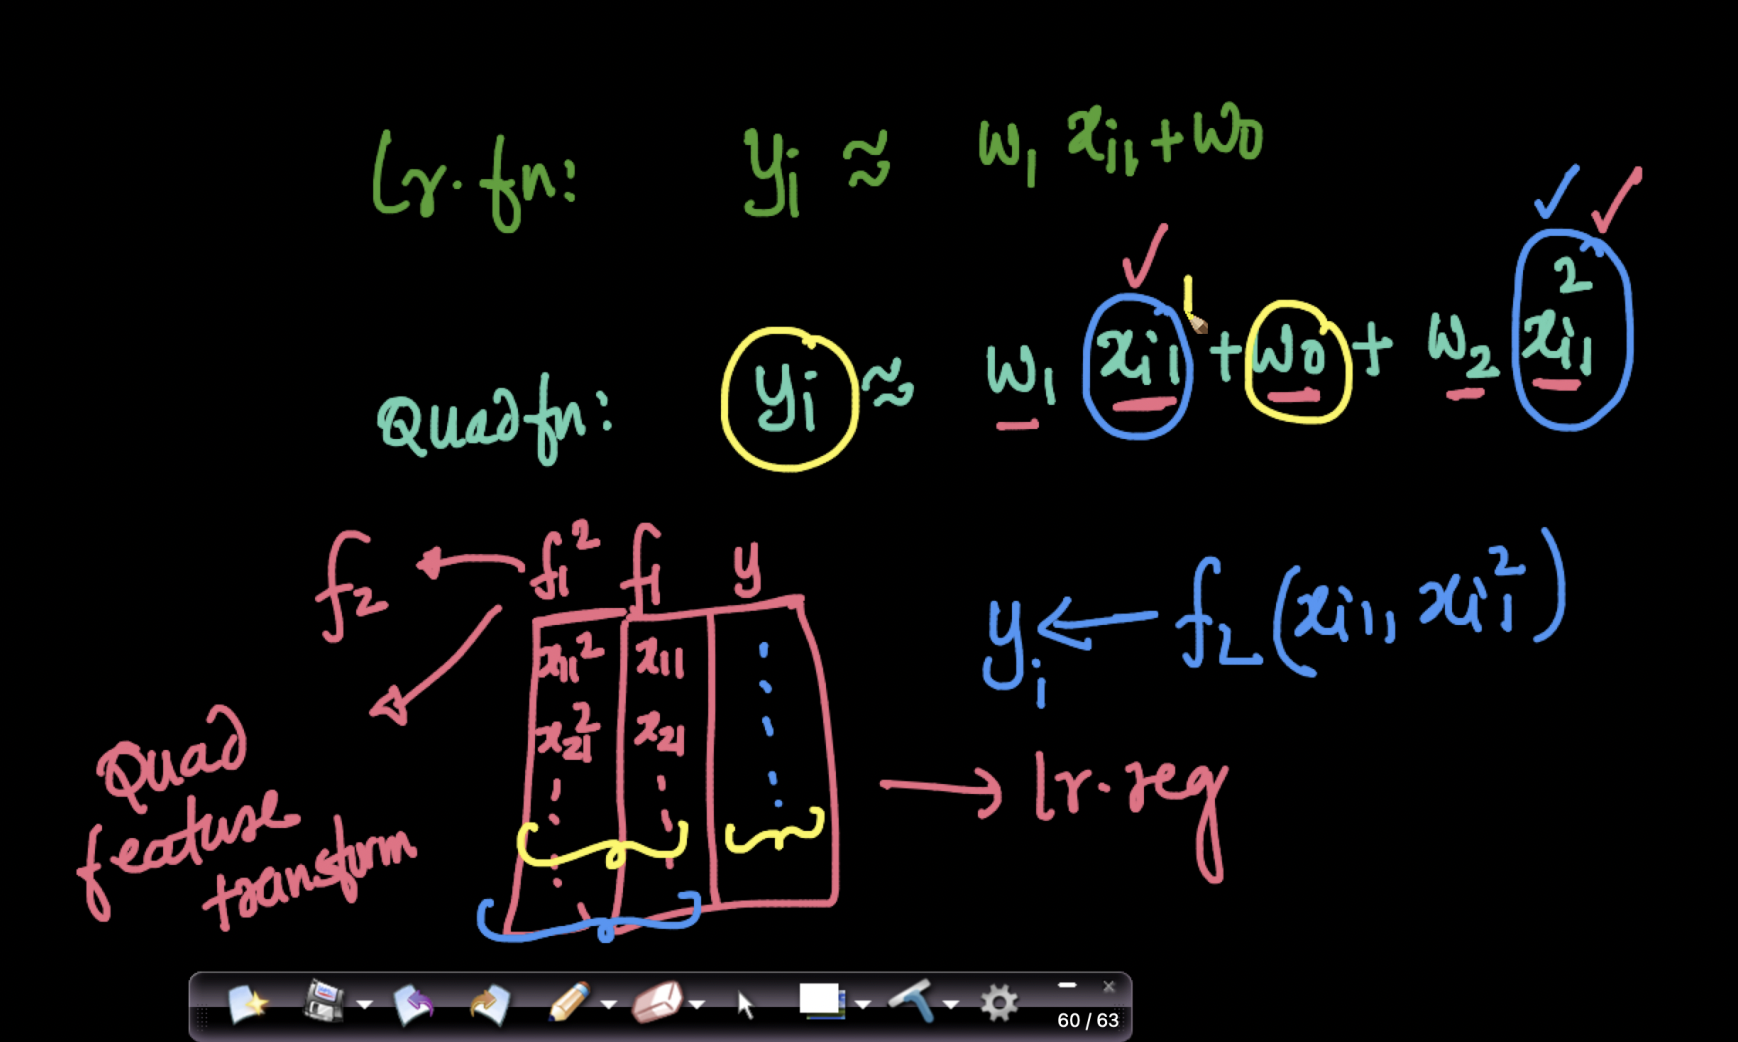

#### **Question: Can we modify the linear regression to make it work in quadratic case?**


For the **Linear plot** :  $y_i \approx w_1 x_i{_1} + w0$

- Now, for the **quadratic plot** lets add a new feature $x_{i1}^2$

- Hence: $y_i \approx w_0 + w_1 \times x_{i1} + w2 \times x_{i_1}^2$

- We are still using a linear function, only we transformed our feature $x_{i1}$ to $x_{i1}^2$

- This transformation is called as **quadratic feature transform** and the model is called a **Polynomial Regression model**

<br>

After creating new feature:
- we simply pass the data to linear regression model and get the predicted value.




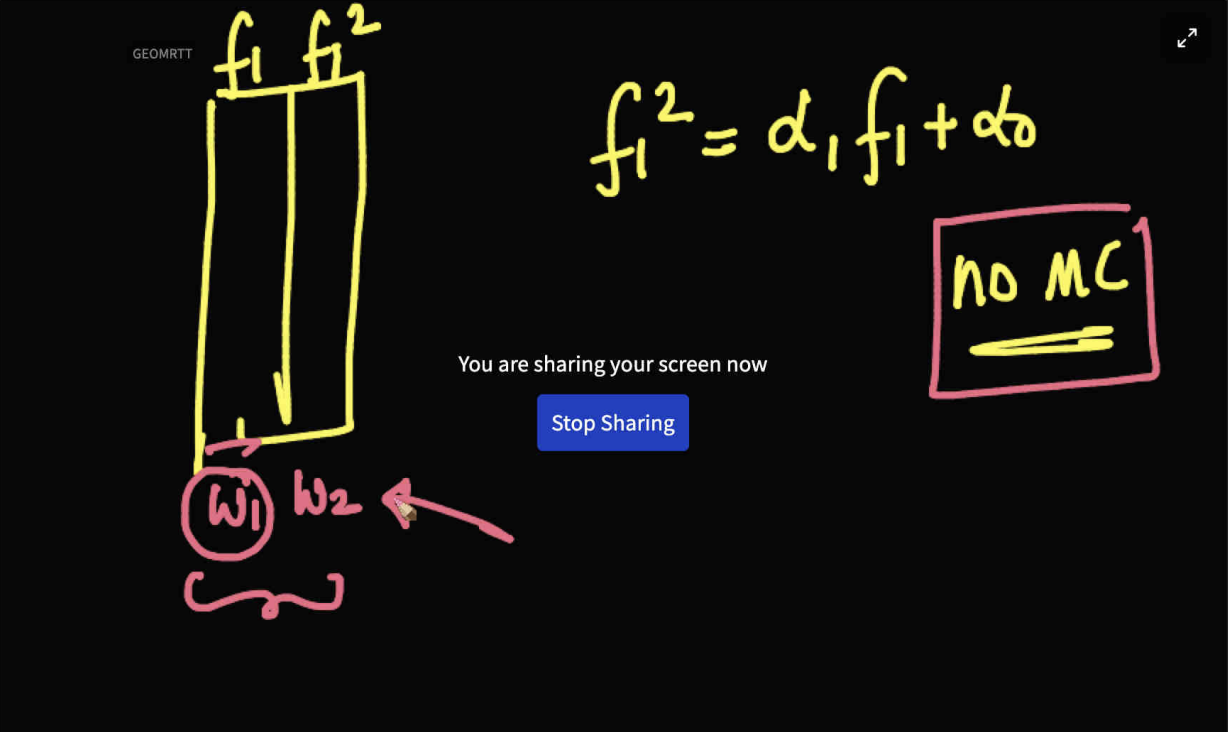

#### Will the new feature $x_{i1}^2 $ be collinear to $x_{i1}$ ?

Ans: The new features will be correlated but there won't be any multicollinearity as
- you can't represent square in terms of linear relationship

# Polynomial Regression Code



#### How does it perform when we add $X^2$ as the feature?


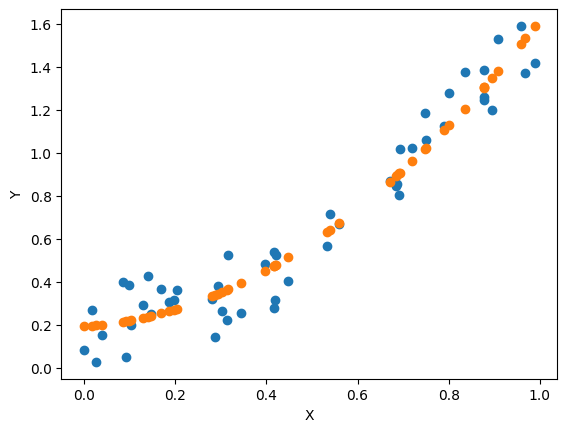

0.937213227713278

In [ ]:
from sklearn.preprocessing import StandardScaler

#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
display(model_deg2.score(X_deg2, y))


**observe**
- The performance of the model increased

<br>

**Note:** Our model is non-linear function of x but a linear function of w
- Since no higher degree of weights are used

#### Adding another feature $X^3$ ?

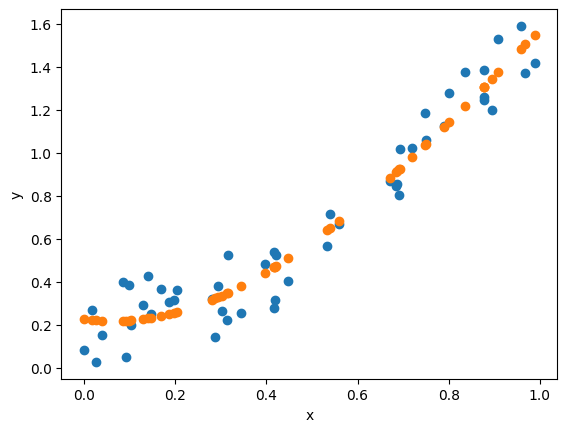

0.9384895307987051

In [ ]:
#Adding X^3 as feature
X_deg3 = np.hstack([X, X**2, X**3])

model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y)
output = model_deg3.predict(X_deg3)

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
display(model_deg3.score(X_deg3, y))

**Observe**
- Performance of the model increased

Following the trend, it might be tempting to try higher degree polynomials




### Sklearn's PolynomialFeatures()

#### How can we generate "polynomial features" intead of creating polynomial `np.hstack([X, X**2, ..X**n])`?


(50, 4)

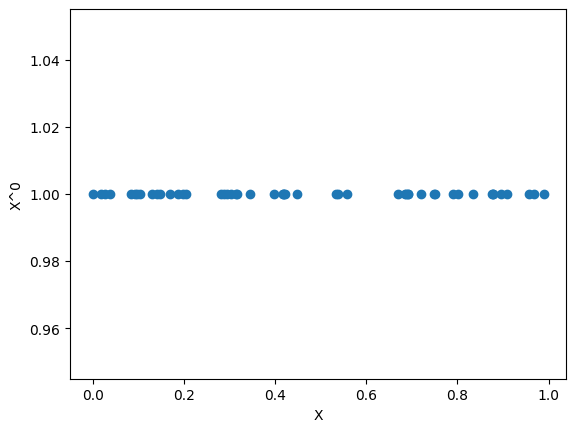

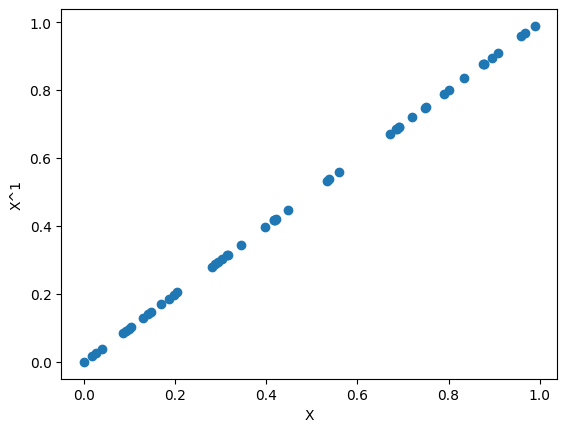

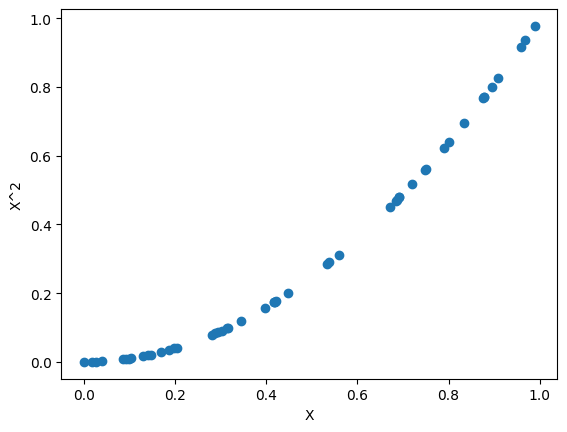

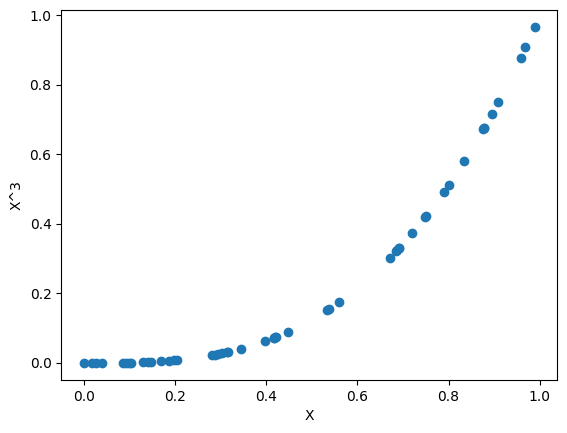

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
display(X_poly.shape) # shape of the generated features

n_features = X_poly.shape[1]

for degree in range(n_features):
    fig = plt.figure()
    plt.scatter(X, X_poly[:,degree])
    plt.xlabel("X")
    plt.ylabel(f"X^{degree}")
    plt.show()

### How to use PolynomialFeatures class to train models with different degrees?

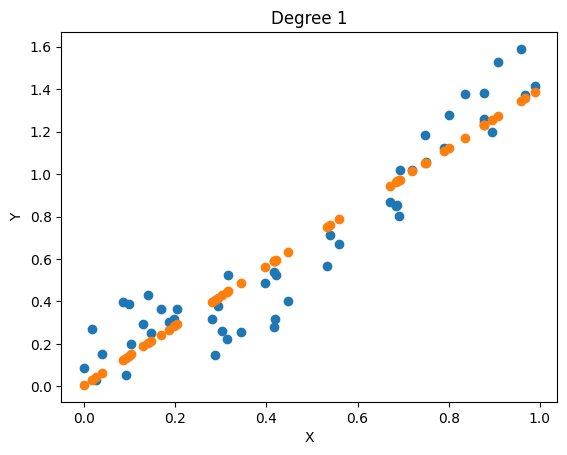

0.8919326382437994

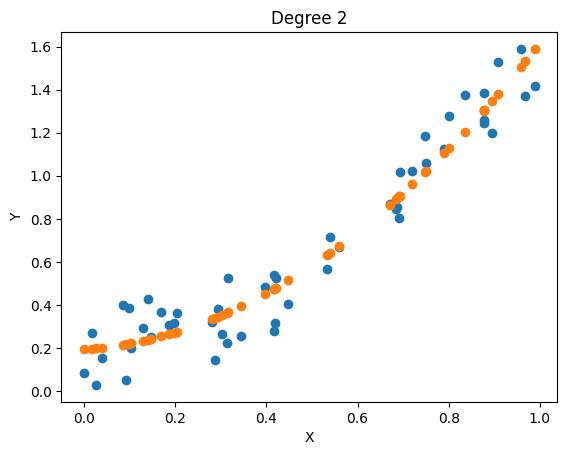

0.937213227713278

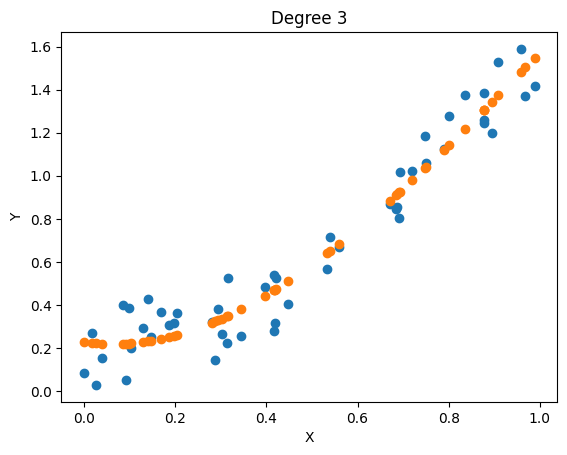

0.9384895307987051

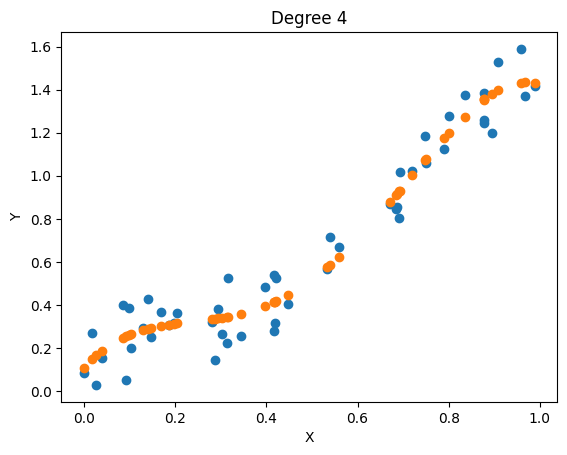

0.950995835560793

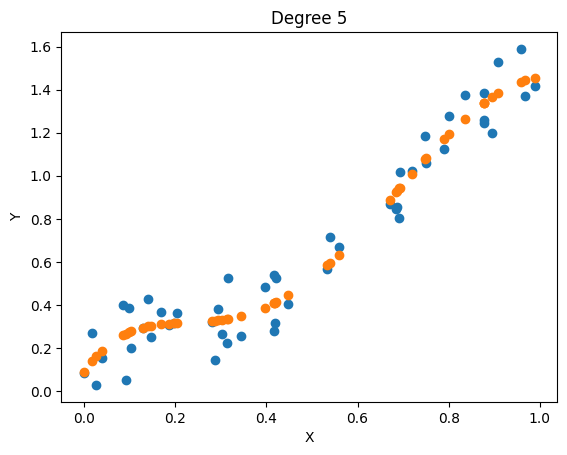

0.9515258649694079

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 6):

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting
    fig = plt.figure()
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()
    display(model.score(X_poly_scaled, y))
    scores.append(model.score(X_poly_scaled, y))

**Observe**:
- As the degree increases, the model performance gets better